# Handling Missing Data - fillna, interpolate, dropna

In [1]:
import pandas as pd
df = pd.read_csv("A:\\Pandas File\\weather_data1.csv", parse_dates=['day'])
type(df.day[0])
df

,day,temperature,windspeed,event
0,2023-01-01,32.0,6.0,Rain
1,2023-01-04,NaN,7.0,Sunny
2,2023-01-05,28.0,NaN,Snow
3,2023-01-06,NaN,7.0,NaN
4,2023-01-07,32.0,NaN,Rain
5,2023-01-08,NaN,NaN,Sunny
6,2023-01-09,NaN,NaN,NaN
7,2023-01-10,34.0,8.0,Cloudy
8,2023-01-11,40.0,12.0,Sunny


In [2]:
df.set_index('day', inplace=True)
df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,NaN,7.0,Sunny
2023-01-05,28.0,NaN,Snow
2023-01-06,NaN,7.0,NaN
2023-01-07,32.0,NaN,Rain
2023-01-08,NaN,NaN,Sunny
2023-01-09,NaN,NaN,NaN
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


## fillna

**Fill all NaN with one specific value**

In [3]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,0.0,7.0,Sunny
2023-01-05,28.0,0.0,Snow
2023-01-06,0.0,7.0,0
2023-01-07,32.0,0.0,Rain
2023-01-08,0.0,0.0,Sunny
2023-01-09,0.0,0.0,0
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


**Fill na using column names and dict**

In [4]:
new_df = df.fillna({
    'temperature': 0,
    'windspeed': 0,
    'event': 'No Event'
})
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,0.0,7.0,Sunny
2023-01-05,28.0,0.0,Snow
2023-01-06,0.0,7.0,No Event
2023-01-07,32.0,0.0,Rain
2023-01-08,0.0,0.0,Sunny
2023-01-09,0.0,0.0,No Event
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


**Use method to determine how to fill na values**

In [5]:
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,32.0,7.0,Sunny
2023-01-05,28.0,7.0,Snow
2023-01-06,28.0,7.0,Snow
2023-01-07,32.0,7.0,Rain
2023-01-08,32.0,7.0,Sunny
2023-01-09,32.0,7.0,Sunny
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


In [6]:
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,28.0,7.0,Sunny
2023-01-05,28.0,7.0,Snow
2023-01-06,32.0,7.0,Rain
2023-01-07,32.0,8.0,Rain
2023-01-08,34.0,8.0,Sunny
2023-01-09,34.0,8.0,Cloudy
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


**Use of axis**

In [7]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,7.0,7.0,Sunny
2023-01-05,28.0,Snow,Snow
2023-01-06,7.0,7.0,NaN
2023-01-07,32.0,Rain,Rain
2023-01-08,Sunny,Sunny,Sunny
2023-01-09,NaN,NaN,NaN
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


**limit parameter**

In [8]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,32.0,7.0,Sunny
2023-01-05,28.0,7.0,Snow
2023-01-06,28.0,7.0,Snow
2023-01-07,32.0,7.0,Rain
2023-01-08,32.0,NaN,Sunny
2023-01-09,NaN,NaN,Sunny
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


## Interpolate

In [9]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.000000,6.00,Rain
2023-01-04,30.000000,7.00,Sunny
2023-01-05,28.000000,7.00,Snow
2023-01-06,30.000000,7.00,NaN
2023-01-07,32.000000,7.25,Rain
2023-01-08,32.666667,7.50,Sunny
2023-01-09,33.333333,7.75,NaN
2023-01-10,34.000000,8.00,Cloudy
2023-01-11,40.000000,12.00,Sunny


In [10]:
new_df = df.interpolate(method="time")
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.000000,6.00,Rain
2023-01-04,29.000000,7.00,Sunny
2023-01-05,28.000000,7.00,Snow
2023-01-06,30.000000,7.00,NaN
2023-01-07,32.000000,7.25,Rain
2023-01-08,32.666667,7.50,Sunny
2023-01-09,33.333333,7.75,NaN
2023-01-10,34.000000,8.00,Cloudy
2023-01-11,40.000000,12.00,Sunny


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. Just google "dataframe interpolate" to see complete documentation**

## dropna

In [11]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


In [12]:
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,NaN,7.0,Sunny
2023-01-05,28.0,NaN,Snow
2023-01-06,NaN,7.0,NaN
2023-01-07,32.0,NaN,Rain
2023-01-08,NaN,NaN,Sunny
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


In [13]:
new_df = df.dropna(thresh=1)
new_df

,temperature,windspeed,event
day,,,
2023-01-01,32.0,6.0,Rain
2023-01-04,NaN,7.0,Sunny
2023-01-05,28.0,NaN,Snow
2023-01-06,NaN,7.0,NaN
2023-01-07,32.0,NaN,Rain
2023-01-08,NaN,NaN,Sunny
2023-01-10,34.0,8.0,Cloudy
2023-01-11,40.0,12.0,Sunny


## Inserting Missing Dates

In [14]:
dt = pd.date_range("01-01-2023","01-11-2023")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,temperature,windspeed,event
2023-01-01,32.0,6.0,Rain
2023-01-02,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN
2023-01-04,NaN,7.0,Sunny
2023-01-05,28.0,NaN,Snow
2023-01-06,NaN,7.0,NaN
2023-01-07,32.0,NaN,Rain
2023-01-08,NaN,NaN,Sunny
2023-01-09,NaN,NaN,NaN
2023-01-10,34.0,8.0,Cloudy


## Magic plot

<AxesSubplot:xlabel='day'>

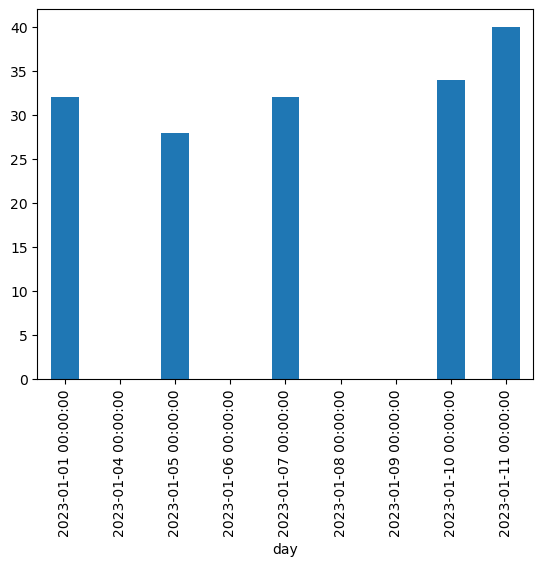

In [15]:
%matplotlib inline
df.temperature.plot.bar()